# Find shapes with hough circles

This tutorial shows how to find shape with a given color within an image.

In [1]:
(ns combative-atoll
  (:require
   [opencv4.core :refer :all]
   [opencv4.colors.rgb :as rgb]
   [opencv4.utils :as u]))

nil

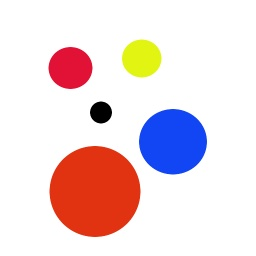

In [2]:
(def bgr-image
  (-> "resources/detect/circles.jpg" imread (u/resize-by 0.5) ))
(u/>>> bgr-image)

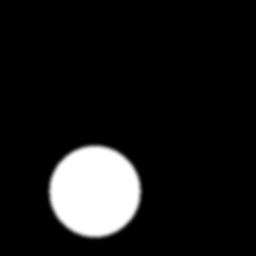

In [3]:
(def ogr-image
  (-> bgr-image
   (clone)
   (median-blur! 3)
   (cvt-color! COLOR_BGR2HSV)
   (in-range! (new-scalar 0 100 100) (new-scalar 10 255 255))
   (gaussian-blur! (new-size 9 9) 2 2)))
(u/>>> ogr-image)

Let's find the circles using the **hough-circles** function from opencv core.

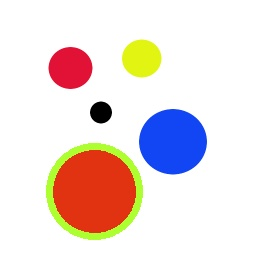

In [5]:
(def circles (new-mat))
(hough-circles ogr-image circles CV_HOUGH_GRADIENT 1 (/ (.rows bgr-image) 8) 100 20 0 0)
(dotimes [i (.cols circles)]
  (let [ _circle (.get circles 0 i) 
         x (nth _circle 0) 
         y (nth _circle 1) 
         r (nth _circle 2)  
         p (new-point x y)]
  (circle bgr-image p (int r) rgb/greenyellow 5)))

(u/>>> bgr-image)